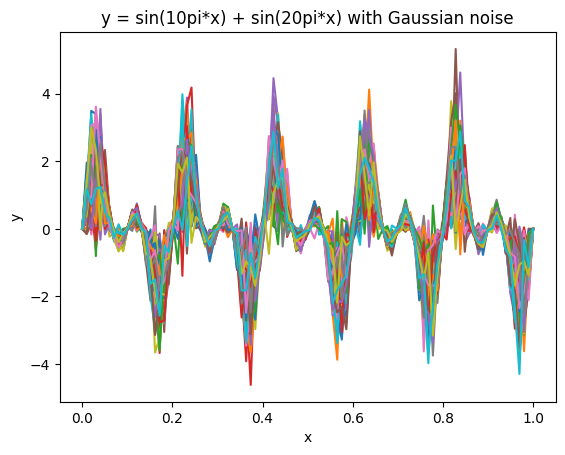

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# create an array of x values
x = np.linspace(0, 1, 100)

# create an array to store the noisy y values
y_noisy = np.zeros((100, len(x)))

# add Gaussian noise to y values and store in y_noisy array
for i in range(100):
    y = np.sin(10*np.pi*x) + np.sin(20*np.pi*x)
    y_noisy[i, :] = y + np.random.normal(loc=0, scale=abs(y)/2, size=len(x))

# plot the curves
for i in range(100):
    plt.plot(x, y_noisy[i, :])

plt.xlabel('x')
plt.ylabel('y')
plt.title('y = sin(10pi*x) + sin(20pi*x) with Gaussian noise')
plt.show()


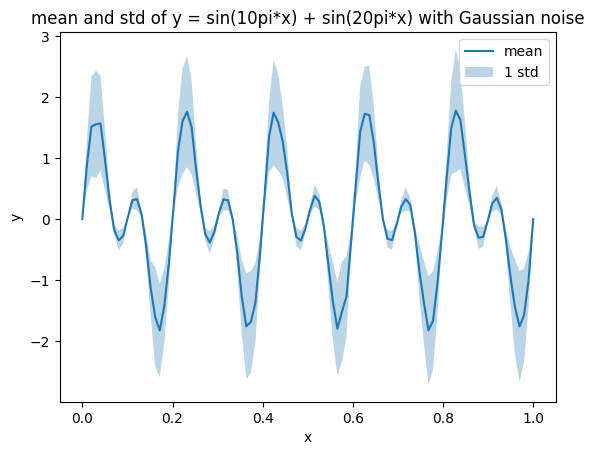

In [38]:
# calculate mean and standard deviation of y values across all instances
y_mean = np.mean(y_noisy, axis=0)
y_std = np.std(y_noisy, axis=0)

# plot the mean and one standard deviation
plt.plot(x, y_mean, label='mean')
plt.fill_between(x, y_mean - y_std, y_mean + y_std, alpha=0.3, label='1 std')
plt.xlabel('x')
plt.ylabel('y')
plt.title('mean and std of y = sin(10pi*x) + sin(20pi*x) with Gaussian noise')
plt.legend()
plt.show()

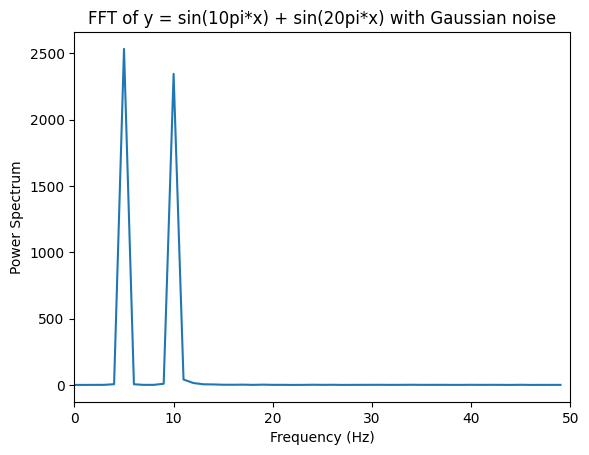

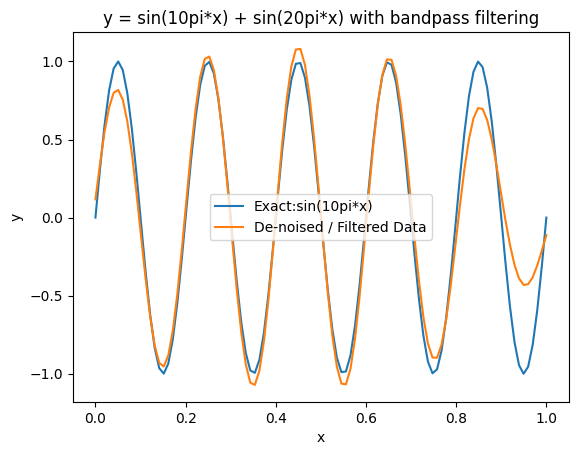

In [39]:
from scipy.fft import fft, fftfreq
from scipy.signal import butter, sosfiltfilt

# perform FFT on y values
y_fft = fft(y_noisy)
freq = fftfreq(len(x), 1/len(x))

# plot the power spectrum of y values
plt.plot(freq[:len(x)//2], np.abs(np.mean(y_fft, axis=0))[:len(x)//2]**2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectrum')
plt.title('FFT of y = sin(10pi*x) + sin(20pi*x) with Gaussian noise')
plt.xlim([0, 50])
plt.show()

# create a bandpass Butterworth filter
fs = 100  # sampling rate
lowcut = 4  # lower cutoff frequency
highcut = 6  # upper cutoff frequency
order = 2  # filter order
nyq = 0.5 * fs  # Nyquist frequency
low = lowcut / nyq
high = highcut / nyq
sos = butter(order, [low, high], btype='bandpass', output='sos')

# apply the filter to y values
y_filtered = sosfiltfilt(sos, y_noisy)

# plot the filtered y values
plt.plot(x, np.sin(10*np.pi*x), label='Exact:sin(10pi*x)')
plt.plot(x, np.mean(y_filtered, axis=0), label='De-noised / Filtered Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = sin(10pi*x) + sin(20pi*x) with bandpass filtering')
plt.legend()
plt.show()
